# 라이브러리

In [143]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# 데이터 불러오기

In [144]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# 결측치 확인

In [145]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


# X, y 분리

In [146]:
X, y = df.loc[:, 'longitude':'median_income'], df['median_house_value']

In [147]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [148]:
y

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0
...,...
16995,111400.0
16996,79000.0
16997,103600.0
16998,85800.0


# 변환을 통한 y 분포의 정규화

<Axes: >

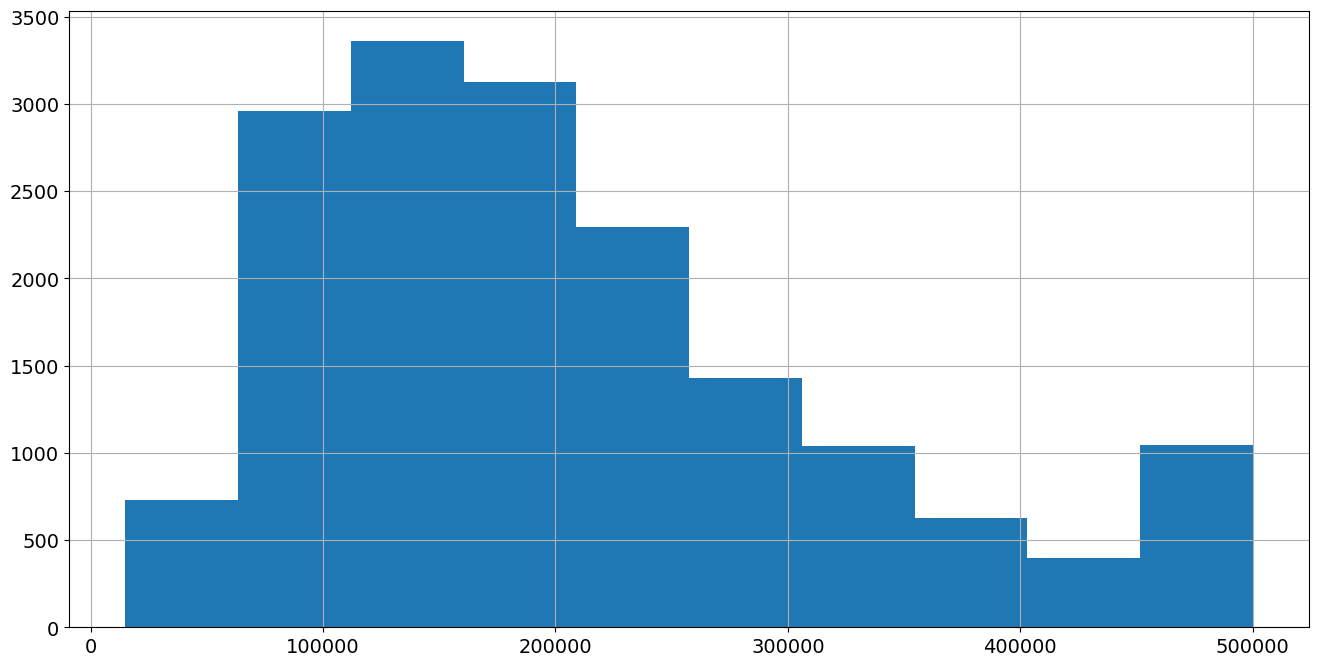

In [149]:
df['median_house_value'].hist()

<Axes: >

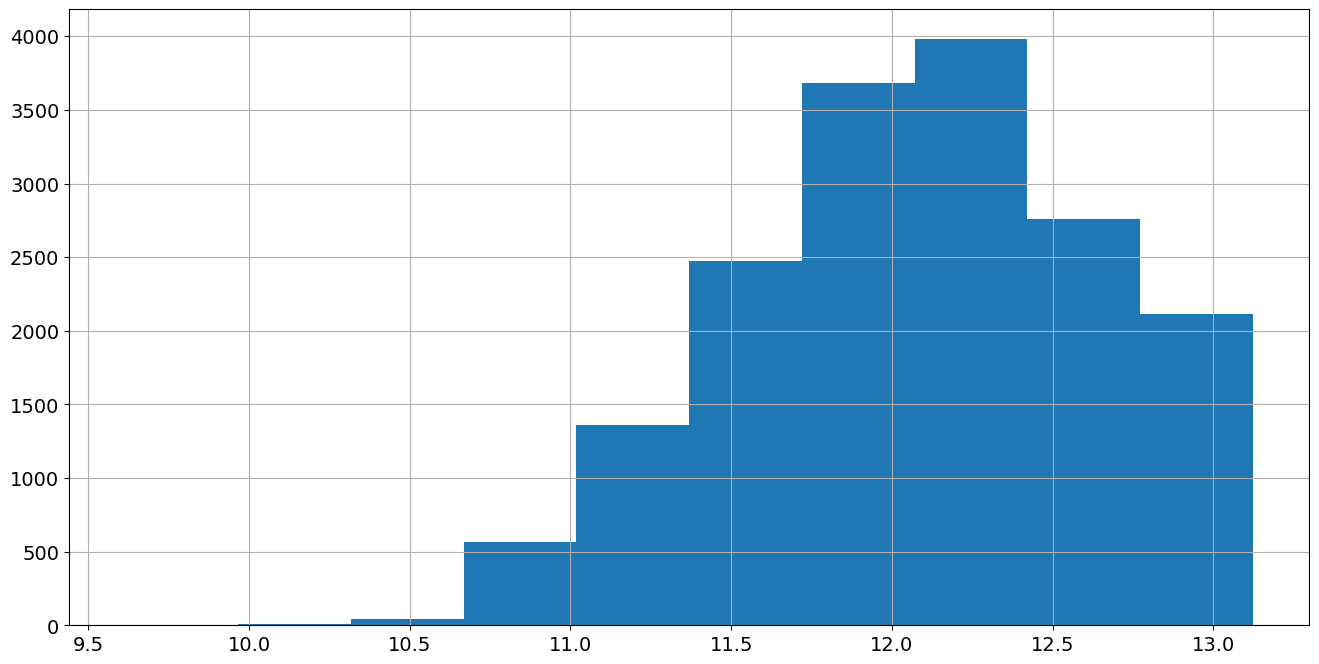

In [150]:
new_y = np.log(df['median_house_value'])
new_y.hist()

In [151]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_scaler.fit(X)
y_scaler.fit(np.log(df[['median_house_value']]))

StandardScaler()

In [152]:
X_scale = X_scaler.transform(X)
X_scale = sm.add_constant(X_scale)
y_scale = y_scaler.transform(np.log(df[['median_house_value']])).flatten()

In [153]:
df_trans = pd.DataFrame(X_scale, columns=['constant'] + X.columns.to_numpy().tolist())

In [154]:
model = sm.OLS(y_scale, df_trans)
model_result = model.fit()

In [155]:
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     3911.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:55:58   Log-Likelihood:                -15245.
No. Observations:               17000   AIC:                         3.051e+04
Df Residuals:                   16991   BIC:                         3.058e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
constant           -3.123e-15      0

In [156]:
predicted = model_result.predict(df_trans)

In [159]:
predicted = np.reshape(predicted.to_numpy(), (-1, 1))

In [160]:
inverse_scaler = y_scaler.inverse_transform(predicted)

In [162]:
predicted_price = np.exp(inverse_scaler).flatten()

In [163]:
predicted_price

array([ 53661.08225072,  70334.97109249,  48098.29631649, ...,
        96278.47691862,  81715.44053293, 148753.67932964])